In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'test_20241206'
file = os.listdir(path)
file.pop(0)

# find a file where an intensity peak appears
max_val = []
for i in range(len(file)):
    df4_temp = pd.read_csv(path+'/'+file[i], index_col='Time')
    max_val.append(df4_temp.max(axis=1).max())
pd.Series(max_val)

0        19.0
1        25.0
2     12560.0
3     12358.0
4     59394.0
5     58654.0
6     57992.0
7     56926.0
8     57125.0
9     57060.0
10    56733.0
11    56700.0
12    56609.0
13    55358.0
14    55657.0
15    54430.0
16    54502.0
17    55937.0
18    55924.0
19    55784.0
20    55936.0
21    55146.0
22    55084.0
23    55606.0
24    54680.0
25    55726.0
26    55232.0
27    55413.0
28    55466.0
29    55490.0
30      168.0
31      136.0
32      129.0
33      705.0
34     1627.0
35      130.0
36      130.0
37      227.0
38      135.0
39      136.0
40      205.0
41      131.0
dtype: float64

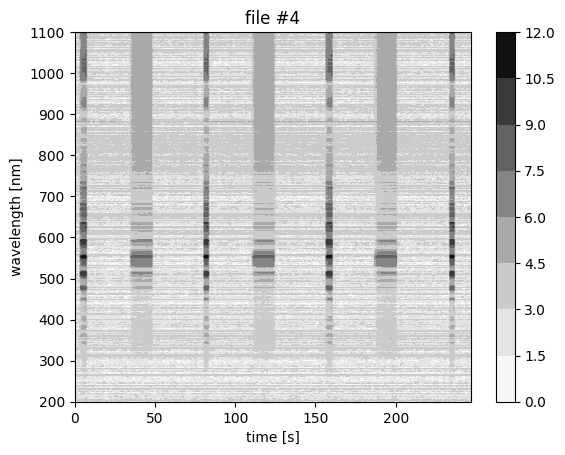

In [7]:
# test with #4
df4 = pd.read_csv(path+'/'+file[4], index_col='Time')

# rename columns
def DropFromSecond(x):
    x = x * 10
    x = np.floor(x)
    return x/10
    
df4_new_cols = [str(DropFromSecond(x)) for x in df4.columns.astype(float)]
df4.columns = df4_new_cols

# replace negative values with zero
for i in range(len(df4.index)):
    for j in range(len(df4.columns)):
        if df4.iloc[i,j]<=1:
            df4.iloc[i,j]=0
        else:
            df4.iloc[i,j] = np.log(df4.iloc[i,j])

# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df4.columns).reshape(-1, 1))
y = mm.transform(np.array(df4.columns).reshape(-1, 1)).flatten() * 1142 + 50

x = range(len(df4.index))
y = range(len(df4.columns))

X, Y = np.meshgrid(x, y)
Z = df4.T
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('file #4')
plt.colorbar()
plt.show()

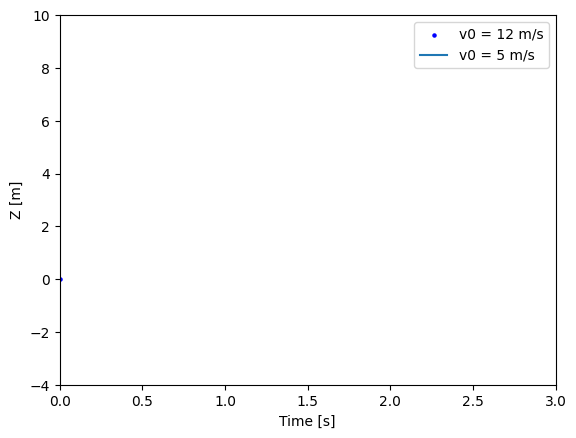

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()

C:\Users\shiny\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


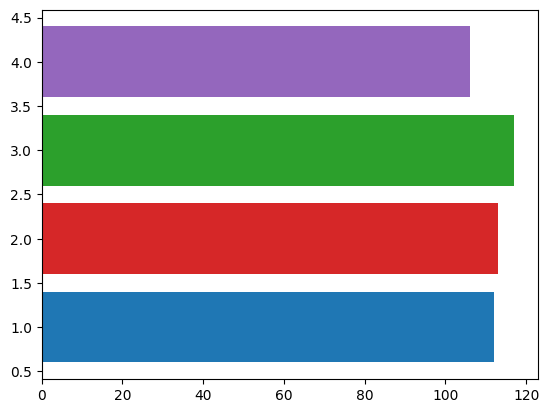

In [10]:
fig, ax = plt.subplots()
rng = np.random.default_rng(19680801)
data = np.array([20, 20, 20, 20])
x = np.array([1, 2, 3, 4])

artists = []
colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
for i in range(20):
    data += rng.integers(low=0, high=10, size=data.shape)
    container = ax.barh(x, data, color=colors)
    artists.append(container)


ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
plt.show()

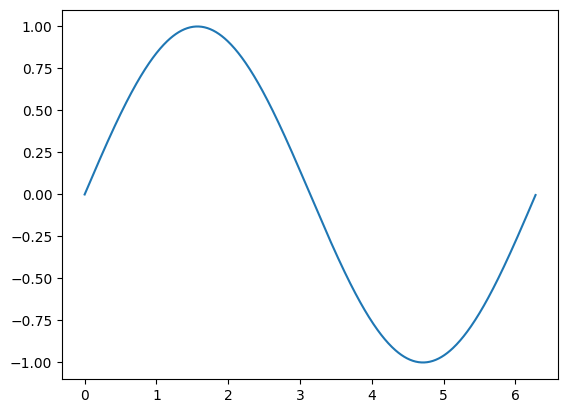

In [16]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()